## Experiments with Embeddings

This notebook is used to experiment with different embeddings we retrieve from language models like BERT and GPT-2. 
Ultimately, words translated in different languages are plotted against each other to show the capabilities of cross-lingual embeddings.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

### Extract Embeddings from BERT

#### 1. Single Sentence

In [2]:
# following this blog: https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b
# Defining global parameters for the embedding extraction

# check if this is current information
#BERT_MODEL = 'uncased_L-12_H-768_A-12'
#BERT_PRETRAINED_DIR = 'gs://cloud-tpu-checkpoints/bert/' + BERT_MODEL
#print('***** BERT pretrained directory: {} *****'.format(BERT_PRETRAINED_DIR))
#!gsutil ls $BERT_PRETRAINED_DIR


#LAYERS = [-1,-2,-3,-4]
#NUM_TPU_CORES = 8
#MAX_SEQ_LENGTH = 128
#BERT_CONFIG = BERT_PRETRAINED_DIR + '/bert_config.json'
#CHKPT_DIR = BERT_PRETRAINED_DIR + '/bert_model.ckpt'
#VOCAB_FILE = BERT_PRETRAINED_DIR + '/vocab.txt'
#INIT_CHECKPOINT = BERT_PRETRAINED_DIR + '/bert_model.ckpt'
#BATCH_SIZE = 128

In [60]:
# alternative approach that looks more sensible (from https://github.com/huggingface/transformers/issues/1950)
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

MODEL_TYPE = 'bert-base-multilingual-uncased'
sequence = ["Hello my dog is cute"]

tokenizer = BertTokenizer.from_pretrained(MODEL_TYPE)
model = TFBertModel.from_pretrained(MODEL_TYPE)

In [4]:
# embeddings 
input_ids = tf.constant(tokenizer.encode(sequence[0]))[None, :] # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [5]:
input_ids

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[  101, 29155, 11153, 14791, 10127, 18233, 10111,   102]],
      dtype=int32)>

In [6]:
last_hidden_states

<tf.Tensor: shape=(1, 8, 768), dtype=float32, numpy=
array([[[-4.0169481e-02,  2.5016520e-02,  7.1823791e-02, ...,
          3.4245901e-02,  1.4751017e-02, -2.0615861e-02],
        [-1.0604652e-02,  5.8223490e-02,  1.4052227e-02, ...,
         -2.0286964e-01,  1.9348401e-01, -8.5748935e-01],
        [-2.2295831e-01, -1.1940919e-01,  4.9146736e-01, ...,
         -2.5826687e-01, -3.6580643e-01, -2.5115848e-01],
        ...,
        [-5.0562215e-01,  4.2590994e-01,  5.5818164e-01, ...,
         -1.9141127e-01,  6.8370527e-01, -4.2567784e-01],
        [ 9.9793263e-04,  5.3418463e-01,  7.1731418e-01, ...,
          1.8512493e-01, -1.1976205e-01, -5.9575319e-01],
        [-1.7058247e-01,  6.3964289e-01, -2.7949953e-01, ...,
          1.0101894e+00,  4.8726225e-01, -1.2460536e+00]]], dtype=float32)>

In [7]:
# tokens
token_ids = tokenizer.encode_plus(sequence[0], max_length=50, pad_to_max_length=False)['input_ids']
token_ids

[101, 29155, 11153, 14791, 10127, 18233, 10111, 102]

In [8]:
labels = [tokenizer.decode(int(token_id)) for token_id in token_ids]
labels

['[ C L S ]',
 'h e l l o',
 'm y',
 'd o g',
 'i s',
 'c u t',
 '# # e',
 '[ S E P ]']

In [9]:
input_ids[0]

<tf.Tensor: shape=(8,), dtype=int32, numpy=
array([  101, 29155, 11153, 14791, 10127, 18233, 10111,   102],
      dtype=int32)>

In [10]:
outputs = model(input_ids)

In [11]:
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [12]:
type(last_hidden_states[0])

tensorflow.python.framework.ops.EagerTensor

In [13]:
# transform into a shape that can be used for dimensionality reduction
#vectors = last_hidden_states

#### 2. Multiple Sentences

In [62]:
sequences = ["Hello, my dog is cute","Hallo, mein Hund ist süss"]


In [15]:
input_ids_multiple = []
outputs_multiple = []
last_hidden_states_multiple = []
token_ids_multiple = []
for index,sequence in enumerate(sequences):
    print(index)
    #input_ids_multiple = [tf.constant(tokenizer.encode(sequences[index]))[None, :] for index,sequence in enumerate(sequences)] # Batch size 1

    input_ids_multiple.append(tf.constant(tokenizer.encode(sequences[index]))[None, :])

#for index,sequence in enumerate(sequences):    
    outputs_multiple.append(model(input_ids_multiple[index]))
    last_hidden_states_multiple.append(outputs_multiple[index][0])
    token_ids_multiple.append(tokenizer.encode_plus(sequences[index], max_length=50, pad_to_max_length=False)['input_ids'])


0
1


In [16]:


#input_ids_multiple = [tf.constant(tokenizer.encode(sequences[index]))[None, :] for index,sequence in enumerate(sequences)] # Batch size 1
input_ids_multiple
#outputs = model(input_ids)
#last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

[<tf.Tensor: shape=(1, 9), dtype=int32, numpy=
 array([[  101, 29155,   117, 11153, 14791, 10127, 18233, 10111,   102]],
       dtype=int32)>,
 <tf.Tensor: shape=(1, 10), dtype=int32, numpy=
 array([[  101, 11672, 10132,   117, 32045, 65714, 10339, 10877, 10107,
           102]], dtype=int32)>]

In [17]:
input_ids_multiple

[<tf.Tensor: shape=(1, 9), dtype=int32, numpy=
 array([[  101, 29155,   117, 11153, 14791, 10127, 18233, 10111,   102]],
       dtype=int32)>,
 <tf.Tensor: shape=(1, 10), dtype=int32, numpy=
 array([[  101, 11672, 10132,   117, 32045, 65714, 10339, 10877, 10107,
           102]], dtype=int32)>]

In [18]:
#outputs_multiple = [model(input_ids_multiple[index]) for index,sequence in enumerate(input_ids_multiple)]
outputs_multiple[1][0]

<tf.Tensor: shape=(1, 10, 768), dtype=float32, numpy=
array([[[-0.05643285, -0.0562983 ,  0.04657263, ...,  0.01502229,
          0.04320478,  0.0153157 ],
        [-0.05100119,  0.42568424, -0.05206291, ..., -0.6043033 ,
          0.4308951 , -0.7492055 ],
        [-0.7355039 ,  0.17071483, -0.08421617, ...,  0.14154503,
          0.003566  , -1.2867622 ],
        ...,
        [-0.409176  ,  0.17465302,  0.64892274, ...,  0.23418134,
          0.70506454, -0.3742396 ],
        [-0.12469118,  0.52839434, -0.26922244, ...,  0.47998846,
         -0.6351285 , -0.4188826 ],
        [-0.4250155 ,  0.4443742 , -0.3398863 , ...,  0.6534614 ,
          0.07701468, -0.9209932 ]]], dtype=float32)>

In [19]:
#last_hidden_states_multiple = [outputs_multiple[index][0] for sequence in outputs_multiple]  # The last hidden-state is the first element of the output tuple

In [20]:
last_hidden_states_multiple

[<tf.Tensor: shape=(1, 9, 768), dtype=float32, numpy=
 array([[[-0.07863382,  0.01926805,  0.05088728, ...,  0.01775989,
           0.01401979, -0.01851666],
         [ 0.08923549, -0.02662132,  0.04989465, ..., -0.18154238,
           0.31731683, -0.88024807],
         [ 0.11105113,  0.32239962,  0.2798227 , ..., -0.01569491,
          -0.552832  , -0.48516607],
         ...,
         [-0.50330734,  0.40592268,  0.7111038 , ..., -0.10453764,
           0.762413  , -0.38292968],
         [-0.05338829,  0.5893923 ,  0.684625  , ...,  0.28321144,
          -0.08393511, -0.528658  ],
         [-0.15164855,  0.55400425, -0.21994124, ...,  0.92896444,
           0.2695102 , -1.2310598 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 10, 768), dtype=float32, numpy=
 array([[[-0.05643285, -0.0562983 ,  0.04657263, ...,  0.01502229,
           0.04320478,  0.0153157 ],
         [-0.05100119,  0.42568424, -0.05206291, ..., -0.6043033 ,
           0.4308951 , -0.7492055 ],
         [-0.7355039 ,  0.

In [21]:
# tokens
#token_ids_multiple = []
#for index,sequence in enumerate(sequences):
#    token_ids_multiple.append(tokenizer.encode_plus(sequences[index], max_length=50, pad_to_max_length=False)['input_ids'])
#token_ids_multiple = [tokenizer.encode_plus(sequences[index], max_length=50, pad_to_max_length=False)['input_ids'] for index,sequence in enumerate(sequences)]
token_ids_multiple

[[101, 29155, 117, 11153, 14791, 10127, 18233, 10111, 102],
 [101, 11672, 10132, 117, 32045, 65714, 10339, 10877, 10107, 102]]

In [22]:
flatten_tokens_multiple = [item for sublist in token_ids_multiple for item in sublist]
flatten_tokens_multiple

[101,
 29155,
 117,
 11153,
 14791,
 10127,
 18233,
 10111,
 102,
 101,
 11672,
 10132,
 117,
 32045,
 65714,
 10339,
 10877,
 10107,
 102]

In [66]:
labels_multiple = [tokenizer.decode(int(token_id)) for token_id in flatten_tokens_multiple] 
labels_multiple

['[ C L S ]',
 'h e l l o',
 ',',
 'm y',
 'd o g',
 'i s',
 'c u t',
 '# # e',
 '[ S E P ]',
 '[ C L S ]',
 'h a l l',
 '# # o',
 ',',
 'm e i n',
 'h u n d',
 'i s t',
 's u s',
 '# # s',
 '[ S E P ]']

In [24]:
print(len(labels_multiple), len(flatten_tokens_multiple))

19 19


### Dimensionality Reduction

#### t-SNE

In [56]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = [tsne_model.fit_transform(tokens_multiple) for sequence in sequences]
#sequences = ["Hello my dog is cute"]

def plot_embeddings2(tokens,labels,sequences):
    tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)

    if len(sequences)>1:
        tsne_inputs = []
        for index,sequence in enumerate(sequences):
            tsne_inputs.append(np.array(tokens[index][0]))

        tsne_outputs = []
        for index,sequence in enumerate(sequences):
            tsne_outputs.append(tsne_model.fit_transform(np.array(tsne_inputs[index])))

        x = [list(zip(*tsne_outputs[index]))[0] for index,sequence in enumerate(sequences)]
        y = [list(zip(*tsne_outputs[index]))[1] for index,sequence in enumerate(sequences)]

        plt.figure(figsize=(7, 6)) 
        for index in range(len(sequences)):
            plt.scatter(x[index],y[index])
            for i in range(len(x[index])):
                plt.annotate(labels[i],
                             xy=(x[index][i], y[index][i]),
                             xytext=(5, 2),
                             textcoords='offset points',
                             ha='right',
                             va='bottom')
    else:
        tsne_outputs = tsne_model.fit_transform(tokens)

        x = tsne_outputs[:,0]
        y = tsne_outputs[:,1]


        plt.figure(figsize=(7, 6)) 
        
        plt.scatter(x,y)

        print(len(x))
        print(len(labels))
        for i in range(len(x)):
            plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')

In [25]:
def plot_embeddings(tokens,labels,sequences):
    tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = new_values[:,0]
    y = new_values[:,1]


    plt.figure(figsize=(7, 6)) 
    if len(sequences)>1:
        
        flatten_tokens = [item for sublist in token_ids_multiple for item in sublist]
        start_next_sequence = int(len(flatten_tokens) / len(sequences))

        plt.scatter(x[:start_next_sequence],y[:start_next_sequence])

        for index,sequence in enumerate(sequences[1:]):
            print(start_next_sequence*index)
            print(type(start_next_sequence*index))
            plt.scatter(x[start_next_sequence*index:],y[start_next_sequence*index:])
    else:
        plt.scatter(x,y)

    print(len(x))
    print(len(labels))
    for i in range(len(x)):
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

8
8


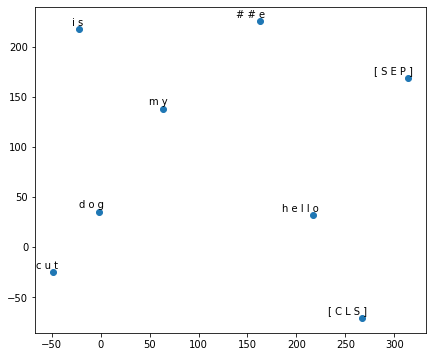

In [64]:
plot_embeddings2(tokens,labels,sequence)

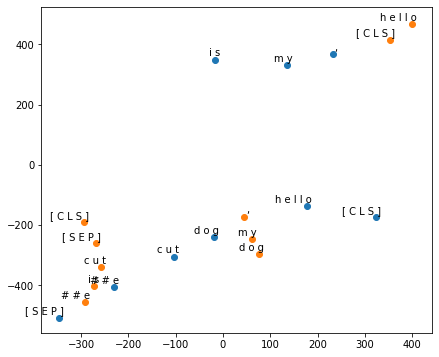

In [67]:
plot_embeddings2(last_hidden_states_multiple,labels_multiple,sequences)

In [63]:
len(sequences)

2

##### 1. Single Sentence

In [26]:
# from https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/notebooks/AMLD%20Intro.ipynb

# For more information of TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# For more information on GloVe: https://nlp.stanford.edu/projects/glove/
#vectors = open('../data/glove_excerpt.txt').read().strip().split('\n')
#vectors = {line.split()[0]:np.array(line.split()[1:]).astype(float) for line in vectors}

In [27]:
last_hidden_states.numpy()[0].shape

(8, 768)

In [28]:
tokens = last_hidden_states.numpy()[0].tolist()
len(tokens)

8

In [29]:
type(tokens)

list

In [30]:
len(sequence)


25

0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
8
8


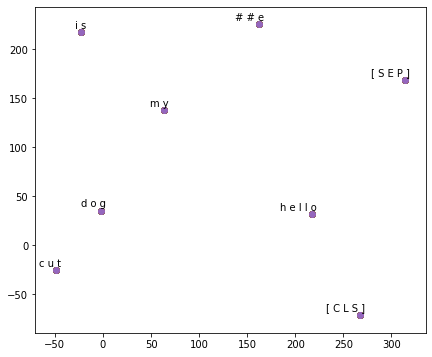

In [31]:
plot_embeddings(tokens,labels,sequence)

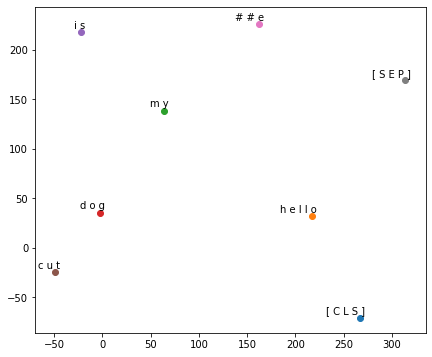

In [32]:
# Let's visualize this, using TSNE, a methods that can reduce the dimensionality of the vectors
#labels = list(vectors.keys())
#tokens = list(vectors.values())
#tokens = last_hidden_states.numpy()[0][0]

tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = new_values[:,0]
y = new_values[:,1]

plt.figure(figsize=(7, 6)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

##### 2. Multiple Sentences

In [33]:
tsne_inputs = []
for index,sequence in enumerate(sequences):
    tsne_inputs.append(np.array(last_hidden_states_multiple[index][0]))

In [34]:
tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_outputs = []
for index,sequence in enumerate(sequences):
    tsne_outputs.append(tsne_model.fit_transform(np.array(tsne_inputs[index])))
    
tsne_outputs
#new_values = [tsne_model.fit_transform(last_hidden_states_multiple) for sequence in sequences]
#new_values
#np.array(new_values)

[array([[ 322.56506 , -175.26256 ],
        [ 176.47827 , -137.863   ],
        [ 231.96774 ,  368.4013  ],
        [ 135.56084 ,  330.52054 ],
        [ -19.93609 , -240.93561 ],
        [ -15.964896,  349.92944 ],
        [-103.41013 , -305.78452 ],
        [-229.82587 , -407.44937 ],
        [-346.02762 , -509.4186  ]], dtype=float32),
 array([[ 352.9157  ,  415.75586 ],
        [ 398.57944 ,  467.69272 ],
        [  44.55948 , -172.81921 ],
        [  61.336018, -248.06631 ],
        [  75.23381 , -296.98856 ],
        [-271.54404 , -403.3205  ],
        [-256.76926 , -341.34357 ],
        [-291.4128  , -456.45917 ],
        [-269.03116 , -261.07404 ],
        [-292.97946 , -190.9454  ]], dtype=float32)]

In [35]:
#print(len(list(zip(*tsne_outputs[0]))[0]), \
#len(list(zip(*tsne_outputs[1]))[0]))

In [36]:
x = [list(zip(*tsne_outputs[index]))[0] for index,sequence in enumerate(sequences)]
y = [list(zip(*tsne_outputs[index]))[1] for index,sequence in enumerate(sequences)]
x
#tsne_outputs[0][:]
#tsne_outputs[:,0]
#tsne_outputs[index_sequence][index_array][0]

[(322.56506,
  176.47827,
  231.96774,
  135.56084,
  -19.93609,
  -15.964896,
  -103.41013,
  -229.82587,
  -346.02762),
 (352.9157,
  398.57944,
  44.55948,
  61.336018,
  75.23381,
  -271.54404,
  -256.76926,
  -291.4128,
  -269.03116,
  -292.97946)]

In [37]:
#next(zip(*tsne_outputs))

In [38]:
#all_tokens_multiple = [last_hidden_states_multiple[index][0] for index,sequence in enumerate(sequences)]
#all_tokens_multiple
#all_tokens_multiple[0].numpy()[0].shape
#all_tokens_multiple[0].numpy()[0].tolist()

In [39]:
#tokens_multiple = [all_tokens_multiple[index].numpy()[0].tolist() for index,sequence in enumerate(sequences)][0]

In [40]:
#print("tokens: ",len(tokens_multiple),"  dimensions: ",len(tokens_multiple[0]))

In [41]:
#len(all_tokens_multiple[0])

In [42]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = [tsne_model.fit_transform(tokens_multiple) for sequence in sequences]
#new_values
#np.array(new_values)

In [43]:
#sequence_1 = tsne_model.fit_transform(tokens_multiple[:len(tokens_multiple[0])])
#sequence_1

In [44]:
#sequence_2 = tsne_model.fit_transform(tokens_multiple[len(tokens_multiple[0]):])
#sequence_2

In [45]:
len(x[0])

9

In [46]:
range(len(sequences))

range(0, 2)

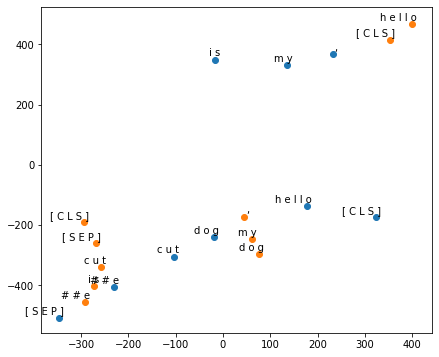

In [47]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = [tsne_model.fit_transform(tokens_multiple) for sequence in sequences]


plt.figure(figsize=(7, 6)) 
for index in range(len(sequences)):
    plt.scatter(x[index],y[index])
    for i in range(len(x[index])):
        plt.annotate(labels_multiple[i],
                     xy=(x[index][i], y[index][i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

In [48]:
plot_embeddings(tokens_multiple,labels_multiple,sequences)

NameError: name 'tokens_multiple' is not defined

In [ ]:
tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = new_values[:,0]
y = new_values[:,1]

start_next_sequence = int(len(tokens) / len(sequences))

plt.figure(figsize=(7, 6)) 
plt.scatter(x[:start_next_sequence],y[:start_next_sequence])
plt.scatter(x[start_next_sequence:],y[start_next_sequence:])

for i in range(len(x)):
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

#### PCA

### Visualization